In [1]:
import matplotlib.pyplot as plt

from prep_terrain_data import make_terrain_data
from class_vis import pretty_picture

In [2]:
features_train, labels_train, features_test, labels_test = make_terrain_data()

the training data (`features_train`, `labels_train`) have both `"fast"` and `"slow"` points mixed together --- separate them so we can give them different colors in the scatterplot and identify them visually

In [3]:
features_train[:10], labels_train[:10]

([[0.6394267984578837, 0.09935462460613032],
  [0.025010755222666936, 0.6856802654812854],
  [0.27502931836911926, 0.5444658614821449],
  [0.22321073814882275, 0.9778425294520467],
  [0.7364712141640124, 0.35867384121231793],
  [0.6766994874229113, 0.3981396427443731],
  [0.8921795677048454, 0.18980856216107955],
  [0.08693883262941615, 0.12215971908726375],
  [0.4219218196852704, 0.848033188463681],
  [0.029797219438070344, 0.45471736857051714]],
 [0, 0, 0, 1.0, 1, 1, 1.0, 0, 1.0, 0])

In [4]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 1]

initial visualization

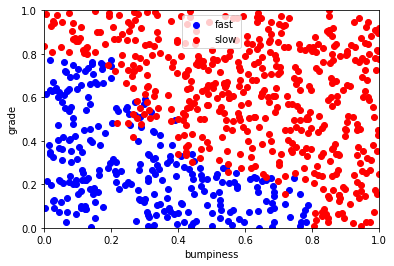

In [5]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

## ↓↓↓ Your Code Goes Here ↓↓↓

name your classifier object `clf` if you want the visualization code `pretty_picture` to show you the decision boundary

In [6]:
import time

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from typing import Union, List


class Model:
    
    def __init__(self, model_type: str = 'knn', **hyparams: Union[str, int, float]):
        
        if model_type == 'knn':
            self.clf = KNeighborsClassifier(**hyparams)
        elif model_type == 'rfc':
            self.clf = RandomForestClassifier(**hyparams)
        elif model_type == 'abc':
            self.clf = AdaBoostClassifier(**hyparams)
        else:
            raise ValueError('Your choosen model are not recognized or currently not supported yet.')

    def train(self, train_x: List[List[float]], train_y: List[float]):
        t0 = time.time()
        self.clf.fit(train_x, train_y)
        t1 = time.time()

        print("Training time:", t1 - t0, "seconds")

        return self.clf
    
    def predict(self, data):
        t0 = time.time()
        prediction = self.clf.predict(data)
        t1 = time.time()
        print("Predicted Labels", prediction)
        print("Time to predict:", t1 - t0, "seconds")
        return prediction

    @staticmethod
    def measure_accuracy(predicted_label, test_label):
        accuracy = accuracy_score(predicted_label, test_label)
        print("Accuracy score:", accuracy)

# KNN Classifier

In [7]:
knn_model = Model(model_type='knn', n_neighbors=3, algorithm="auto")
clf = knn_model.train(features_train, labels_train)

Training time: 0.002274036407470703 seconds


In [8]:
predicted = knn_model.predict(features_test)
Model.measure_accuracy(predicted, labels_test)

Predicted Labels [0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
Time to predict: 0.016253232955932617 seconds
Accuracy score: 0.936


/mnt/data/data-gpu/asrul_workspace/belajar/ud120/05-choose-your-own/class_vis.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='seismic')


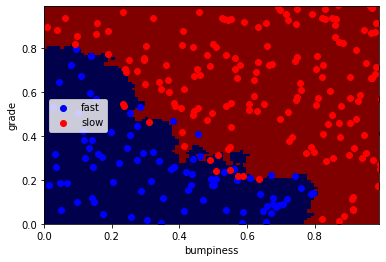

In [9]:
try:
    pretty_picture(clf, features_test, labels_test, 'knn.jpg')
except NameError:
    pass

# Ensemble: Random Forest Classifier

In [ ]:
rfc_model = Model(model_type='rfc', n_neighbors=3, algorithm="auto")
clf_rfc = rfc_model.train(features_train, labels_train)

In [ ]:
predicted_rfc = rfc_model.predict(features_test)
Model.measure_accuracy(predicted_rfc, labels_test)

In [ ]:
try:
    pretty_picture(clf_rfc, features_test, labels_test, 'knn.jpg')
except NameError:
    pass